In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,10

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [100]:
name = ["Messi", "Ronaldo", "Cryuff", "Maldini", "Ramos",
        "Xavi", "Iniesta", "Maradona", "Zidane", "Pepe",
        "Puyol", "Beckenbauer", "Guardiola", "DeBruyne", "Lewandowski"]

In [101]:
position = ["attack", "attack", "attack", "defense", "defense",
        "midfield","midfield", "attack", "midfield", "defense",
        "defense", "defense", "midfield", "midfield", "attack"]

In [102]:
matches = [757, 1044, 347+47+92, 901, 507+63+143,
        578+84+195, 749, 333, 631, 433+52+121,
        595, 584, 292+49+72, 355+57+63, 397]

In [103]:
goals = [651, 740,  171+38+40, 33, 20+9+74,
        18+13+78, 153, 259+34, 121, 5+1+30,
        19, 58, 9+2+3, 78+16+13, 292]

In [104]:
Assists = [285, 224, 26+15+84, 43, 31+1+8,
        212, 157, 30, 119, 21+3+6,
        13, 73, 10+7+20, 147+18+23,  59]

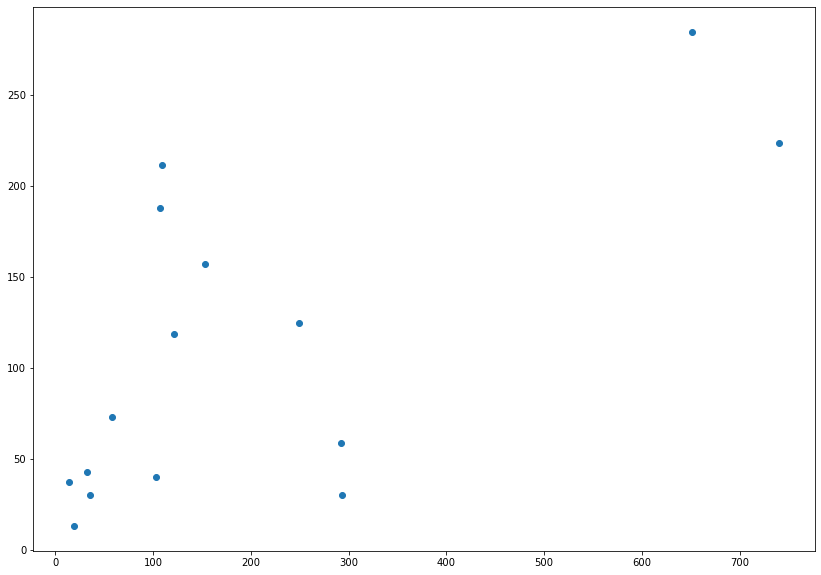

In [105]:
plt.scatter(goals, Assists)

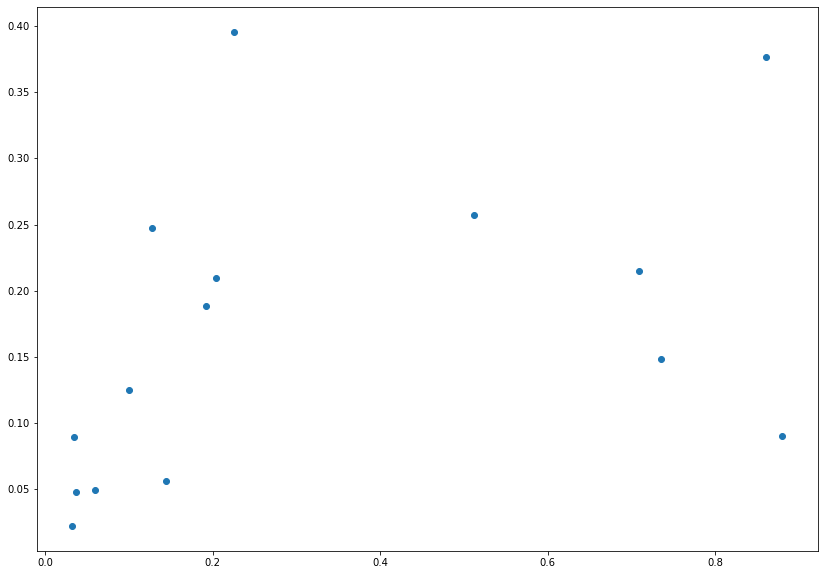

In [106]:
plt.scatter(np.divide(goals,matches), np.divide(Assists,matches))

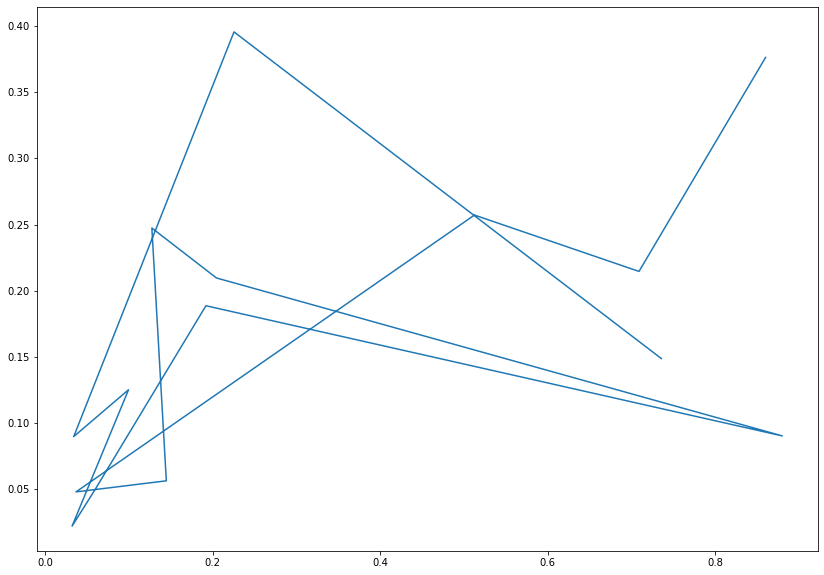

In [107]:
plt.plot(np.divide(goals,matches), np.divide(Assists,matches))

In [108]:
data = {'Names': name,
        'Position': position,
        'Matches': matches,
        'Goals': goals,
        'Assists': Assists
       }

In [109]:
DT = pd.DataFrame(data)

In [110]:
DT

,Names,Position,Matches,Goals,Assists
0,Messi,attack,757,651,285
1,Ronaldo,attack,1044,740,224
2,Cryuff,attack,486,249,125
3,Maldini,defense,901,33,43
4,Ramos,defense,713,103,40
5,Xavi,midfield,857,109,212
6,Iniesta,midfield,749,153,157
7,Maradona,attack,333,293,30
8,Zidane,midfield,631,121,119
9,Pepe,defense,606,36,30


In [111]:
Goals_per_match = DT.Goals/DT.Matches

In [112]:
Goals_per_match

0     0.859974
1     0.708812
2     0.512346
3     0.036626
4     0.144460
5     0.127188
6     0.204272
7     0.879880
8     0.191759
9     0.059406
10    0.031933
11    0.099315
12    0.033898
13    0.225263
14    0.735516
dtype: float64

In [113]:
DT['Goals_per_match'] = Goals_per_match

In [114]:
DT

,Names,Position,Matches,Goals,Assists,Goals_per_match
0,Messi,attack,757,651,285,0.859974
1,Ronaldo,attack,1044,740,224,0.708812
2,Cryuff,attack,486,249,125,0.512346
3,Maldini,defense,901,33,43,0.036626
4,Ramos,defense,713,103,40,0.144460
5,Xavi,midfield,857,109,212,0.127188
6,Iniesta,midfield,749,153,157,0.204272
7,Maradona,attack,333,293,30,0.879880
8,Zidane,midfield,631,121,119,0.191759
9,Pepe,defense,606,36,30,0.059406


In [115]:
DT['Assists_per_match'] = DT.Assists/DT.Matches

In [116]:
DT

,Names,Position,Matches,Goals,Assists,Goals_per_match,Assists_per_match
0,Messi,attack,757,651,285,0.859974,0.376486
1,Ronaldo,attack,1044,740,224,0.708812,0.214559
2,Cryuff,attack,486,249,125,0.512346,0.257202
3,Maldini,defense,901,33,43,0.036626,0.047725
4,Ramos,defense,713,103,40,0.144460,0.056101
5,Xavi,midfield,857,109,212,0.127188,0.247375
6,Iniesta,midfield,749,153,157,0.204272,0.209613
7,Maradona,attack,333,293,30,0.879880,0.090090
8,Zidane,midfield,631,121,119,0.191759,0.188590
9,Pepe,defense,606,36,30,0.059406,0.049505


In [117]:
DT['Goal_Contribution_per_match'] = DT.Goals_per_match + DT.Assists_per_match

In [118]:
DT

,Names,Position,Matches,Goals,Assists,Goals_per_match,Assists_per_match,Goal_Contribution_per_match
0,Messi,attack,757,651,285,0.859974,0.376486,1.236460
1,Ronaldo,attack,1044,740,224,0.708812,0.214559,0.923372
2,Cryuff,attack,486,249,125,0.512346,0.257202,0.769547
3,Maldini,defense,901,33,43,0.036626,0.047725,0.084351
4,Ramos,defense,713,103,40,0.144460,0.056101,0.200561
5,Xavi,midfield,857,109,212,0.127188,0.247375,0.374562
6,Iniesta,midfield,749,153,157,0.204272,0.209613,0.413885
7,Maradona,attack,333,293,30,0.879880,0.090090,0.969970
8,Zidane,midfield,631,121,119,0.191759,0.188590,0.380349
9,Pepe,defense,606,36,30,0.059406,0.049505,0.108911


In [119]:
X = DT.iloc[:,2:].values
y = DT.iloc[:,1].values

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2)

In [121]:
X_train

array([[9.01000000e+02, 3.30000000e+01, 4.30000000e+01, 3.66259711e-02,
        4.77247503e-02, 8.43507214e-02],
       [1.04400000e+03, 7.40000000e+02, 2.24000000e+02, 7.08812261e-01,
        2.14559387e-01, 9.23371648e-01],
       [5.95000000e+02, 1.90000000e+01, 1.30000000e+01, 3.19327731e-02,
        2.18487395e-02, 5.37815126e-02],
       [3.33000000e+02, 2.93000000e+02, 3.00000000e+01, 8.79879880e-01,
        9.00900901e-02, 9.69969970e-01],
       [4.13000000e+02, 1.40000000e+01, 3.70000000e+01, 3.38983051e-02,
        8.95883777e-02, 1.23486683e-01],
       [4.86000000e+02, 2.49000000e+02, 1.25000000e+02, 5.12345679e-01,
        2.57201646e-01, 7.69547325e-01],
       [7.49000000e+02, 1.53000000e+02, 1.57000000e+02, 2.04272363e-01,
        2.09612817e-01, 4.13885180e-01],
       [3.97000000e+02, 2.92000000e+02, 5.90000000e+01, 7.35516373e-01,
        1.48614610e-01, 8.84130982e-01],
       [4.75000000e+02, 1.07000000e+02, 1.88000000e+02, 2.25263158e-01,
        3.95789474e-01, 

In [122]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [123]:
y_pred = neigh.predict(X_test)

In [124]:
y_pred

array(['midfield', 'midfield', 'midfield', 'attack', 'midfield'],
      dtype=object)

In [125]:
y_test

array(['defense', 'defense', 'midfield', 'attack', 'defense'],
      dtype=object)

In [126]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 0 0]
 [0 0 3]
 [0 0 1]]


0.4